In [25]:
import pandas as pd
import seaborn as sns
import numpy as np


df = pd.read_csv("full_cleaned_data.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df

,Name,Street,Price Tags,Average Rating,Review text,Category 1,Category 2,Customer Satisfaction
0,THE FARMHOUSE TAP & GRILL,Bank_St,2.0,4.0,julie another wonderful experience farmhouse! ...,burgers,tradamerica,High
1,HEN OF THE WOOD,NaN,3.0,4.5,"cozy interior, fresh (we saw farmer drop stack...",newamerican,NaN,High
2,THE GRYPHON,Main_St,2.0,4.5,"best brunch. bloody mary' die for, love unique...",nightlife,newamerican,High
3,JUNIPER BAR & RESTAURANT,Cherry_St,2.0,4.0,met family crazy thanksgiving weekend. great p...,tradamerica,NaN,High
4,HONEY ROAD,Church_St,2.0,4.5,review mentioned difficult get reservation res...,NaN,NaN,High
...,...,...,...,...,...,...,...,...
105,KRU COFFEE,Church_St,1.0,4.5,stopped last day struggling decide grab coffee...,coffee,sandwiche,High
106,HALVORSON’S UPSTREET CAFE,Church_St,2.0,3.0,great food. cozy atmosphere. made reservations...,tradamerica,beer_and_wine,Low
107,PIESANOS,Main_St,2.0,3.0,"1 1/2 hour delivery wait...i get it, it' busy,...",pizza,italian,Low
108,KESTREL COFFEE ROASTERS,Maple_St,NaN,4.5,sweet little roastery free short term streetsi...,cafes,coffee,High


<AxesSubplot:xlabel='Customer Satisfaction', ylabel='count'>

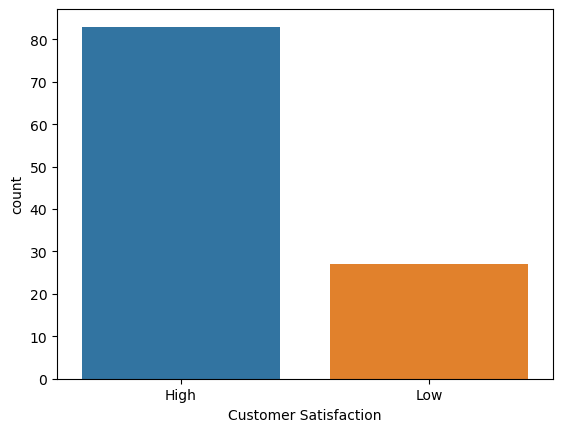

In [26]:
# we have imbalanced data
sns.countplot(x='Customer Satisfaction', data=df)

#(high satisfaction = rating between 4-5)
#(low satisfaction = ratng below 4)

In [27]:
def remove_punctuation(text):
    # initializing punctuations string
    punctuation = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

    #get rid o
    for char in text:
        if char in punctuation:
            clean_text = text.replace(char, '')
    return clean_text

In [28]:
def select_columns(data, *columns):
 
    """Select only columns passed as arguments."""

    return data.loc[:, columns]

In [29]:
def process_data(data):
 
    # Transform Data, Select Features
    data = select_columns(data,'Street','Price Tags', 'Review text', 'Category 1', 'Category 2', 'Customer Satisfaction')
    
    #turn y ('Customer Satisfaction') into either 1 or 0
    df['Customer Satisfaction'] = df['Customer Satisfaction'].map({'High': 1, 'Low': 0})
    
    return data

In [30]:
def fix_missing(df):
    '''Function to fill in missing data with the mode'''
    
    #find the modes
    modes = df.mode()
    mode_list = modes.values.tolist()[0]
    
    
    df[['Street']] = df[['Street']]. fillna(str(mode_list[0]))
    df[['Price Tags']] = df[['Price Tags']]. fillna(str(mode_list[1]))
    df[['Category 1']] = df[['Category 1']]. fillna(str(mode_list[3]))
    df[['Category 2']] = df[['Category 2']]. fillna(str(mode_list[4]))
    
    return df

In [31]:
def reset_index(df):
    df = df.reset_index()
    df = df.drop(['index'], axis=1)
    return df

In [32]:
def get_predictor_response_vars(data):
    # Return predictors and response variables separately
    x = data.drop(['Customer Satisfaction'], axis = 1)
    y = data.loc[:, 'Customer Satisfaction']
    
    return x, y
    


In [33]:
def one_hot_encoding(df, column_name):
    '''Returns df with chosen column replaced by one hot encoding'''
    from sklearn.feature_extraction.text import CountVectorizer
    #fit vectorizer to data
    vectorizer = CountVectorizer()
    vectorizer.fit_transform(df[column_name])
    
    #convert into array of numbers
    numbers = vectorizer.transform(df[column_name])
    words = vectorizer.get_feature_names_out()
    one_hot = pd.DataFrame(numbers.toarray(), columns=words)

    #add one-hot to original df, get rid of review text
    df = df.drop([column_name], axis=1)
    full_df = pd.concat([df, one_hot], axis=1)
    return full_df

In [34]:
#get text ready for training and test set by cleaning punctuation
reviews_clean = []
reviews = list(df["Review text"])
for review in reviews:
    reviews_clean.append(remove_punctuation(review))
#delete old review text
df = df.drop(['Review text'], axis=1)
df = pd.concat([df, pd.DataFrame(reviews_clean, columns= ['Review text'])], axis=1)


In [35]:
#get data ready for classification model by...

# #preprocessing data
df = process_data(df)
df = fix_missing(df)

#turning all text into numerical values
#street column
df = one_hot_encoding(df, 'Street')
##review text column
df = one_hot_encoding(df, 'Review text')
#catgory 1 column
df = one_hot_encoding(df, 'Category 1')
#category 2 column
df = one_hot_encoding(df, 'Category 2')

#customer satisfaction
df['Customer Satisfaction'] = df['Customer Satisfaction'].replace('High', 1)
df['Customer Satisfaction'] = df['Customer Satisfaction'].replace('Low', 0)


In [36]:

df

,Price Tags,Customer Satisfaction,bank_st,battery_st,center_st,cherry_st,church_st,colchester_ave,college_st,flynn_ave,...,mexican,newamerican,noodles,pizza,pubs,sala,sandwiche,soup,tradamerica,wine_bar
0,2.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3.0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2.0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2.0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2.0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
106,2.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#look to see where there are NaNS (can't have this when training model)
sum = 0
for (colname,colval) in df.iteritems():
    if df[colname].isnull().values.any():
        pass
    
#drop these columns (have NaNs)
df = df.drop(['review'], axis=1)
df = df.drop(['text'], axis=1)

#check if missing values still exist after fixing
sum = 0
for (colname,colval) in df.iteritems():
    if df[colname].isnull().values.any():
        print(colname)
    

In [38]:
#see if there are duplicate columns
cols = list(df.columns)
len(cols) != len(set(cols))

True

In [39]:
#get rid of duplicate columns by adding them together
df = df.groupby(axis=1, level=0).sum()

In [40]:
df

,00,000,00a,00pm,01,049,04pm,050,05613c4c3522b0b90a0019ce0f071a351e5ea8f95371d296bae26ff2bd0ec050,05pm,...,zippy,zoe,zone,zooming,zucchini,zuliani,zuppa,étouffée,ģood,どうもありがとう
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#split the data
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, train_size=.8, random_state=42)

x_train, y_train = get_predictor_response_vars(train)
x_val, y_val = get_predictor_response_vars(val)

In [42]:
#reset indices
x_train = reset_index(x_train)
y_train = reset_index(y_train)

In [43]:
#fit model to our training data
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
#train random forest model
random_forest.fit(x_train, y_train.values.ravel())
#change array shape with .values.ravel()

RandomForestClassifier()

In [44]:
#test
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
y_pred = random_forest.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

#Problem: seems like we would get a really high accuracy if we just picked one choice due to imbalance data
#new idea - fix this with SMOTE oversampling

Accuracy: 0.9090909090909091
Precision: 0.9047619047619048
Recall: 1.0


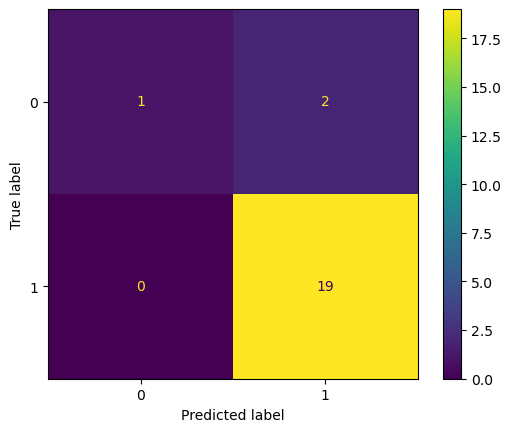

In [45]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion = confusion_matrix(y_val, y_pred)

ConfusionMatrixDisplay(confusion_matrix=confusion).plot()

<AxesSubplot:>

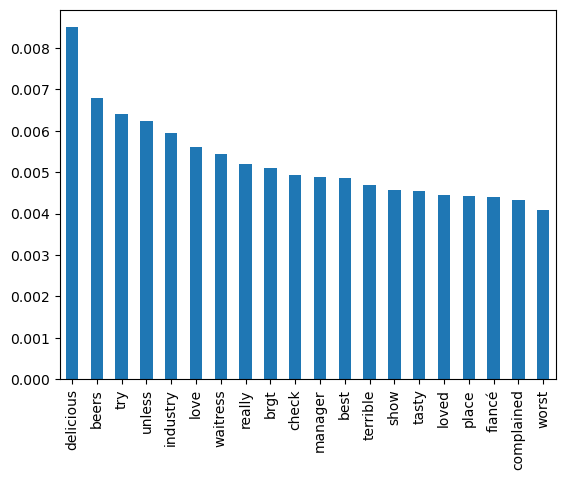

In [46]:
#important of each feature
# feature importances anfd feature names
feature_importances = pd.Series(random_forest.feature_importances_, index=x_train.columns).sort_values(ascending=False)

#top 20 most important features
bar_data = feature_importances[:20]
# bar chart
bar_data.plot.bar()

In [23]:
#least important features
least_important = feature_importances[-20:]
least_important

fennel       0.0
featuring    0.0
feeling      0.0
february     0.0
fed          0.0
fee          0.0
feed         0.0
feedback     0.0
feeding      0.0
feeds        0.0
feelings     0.0
fence        0.0
feels        0.0
fees         0.0
feet         0.0
feldman      0.0
fell         0.0
fella        0.0
fellow       0.0
どうもありがとう     0.0
dtype: float64

In [24]:
#display first two decision trees in forest
from sklearn.tree import export_graphviz

for i in range(2):
    tree = random_forest.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

NameError: name 'graphviz' is not defined